In [121]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
train_df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

In [123]:
train_df.shape

(1460, 81)

In [124]:
train_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [125]:
test_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [126]:
price = train_df['SalePrice']
test_id = test_df["Id"]

train_df1 = train_df.drop(['Id', 'SalePrice'], axis=1)
test_df1 = test_df.drop('Id',axis=1)

# combine data
data = pd.concat((train_df1, test_df1)).reset_index(drop = True) 

In [127]:
data.shape

(2919, 79)

In [128]:
# null value
list(zip(data[:],data.isnull().sum()))

[('MSSubClass', 0),
 ('MSZoning', 4),
 ('LotFrontage', 486),
 ('LotArea', 0),
 ('Street', 0),
 ('Alley', 2721),
 ('LotShape', 0),
 ('LandContour', 0),
 ('Utilities', 2),
 ('LotConfig', 0),
 ('LandSlope', 0),
 ('Neighborhood', 0),
 ('Condition1', 0),
 ('Condition2', 0),
 ('BldgType', 0),
 ('HouseStyle', 0),
 ('OverallQual', 0),
 ('OverallCond', 0),
 ('YearBuilt', 0),
 ('YearRemodAdd', 0),
 ('RoofStyle', 0),
 ('RoofMatl', 0),
 ('Exterior1st', 1),
 ('Exterior2nd', 1),
 ('MasVnrType', 24),
 ('MasVnrArea', 23),
 ('ExterQual', 0),
 ('ExterCond', 0),
 ('Foundation', 0),
 ('BsmtQual', 81),
 ('BsmtCond', 82),
 ('BsmtExposure', 82),
 ('BsmtFinType1', 79),
 ('BsmtFinSF1', 1),
 ('BsmtFinType2', 80),
 ('BsmtFinSF2', 1),
 ('BsmtUnfSF', 1),
 ('TotalBsmtSF', 1),
 ('Heating', 0),
 ('HeatingQC', 0),
 ('CentralAir', 0),
 ('Electrical', 1),
 ('1stFlrSF', 0),
 ('2ndFlrSF', 0),
 ('LowQualFinSF', 0),
 ('GrLivArea', 0),
 ('BsmtFullBath', 2),
 ('BsmtHalfBath', 2),
 ('FullBath', 0),
 ('HalfBath', 0),
 ('Bedroom

In [129]:
# check details
data["MSZoning"].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [130]:
data["Street"].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [131]:
data["MasVnrType"].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [132]:
# drop the column if the amout of the nan in a column is more than 50% of the df
perc = 50.0
min_count = int(((100-perc)/100)*data.shape[0] + 1)
data1 = data.dropna(axis=1,thresh=min_count)

In [133]:
data1.shape

(2919, 75)

In [134]:
# columns more than 50% has been drop
list(zip(data1[:],data1.isnull().sum()))

[('MSSubClass', 0),
 ('MSZoning', 4),
 ('LotFrontage', 486),
 ('LotArea', 0),
 ('Street', 0),
 ('LotShape', 0),
 ('LandContour', 0),
 ('Utilities', 2),
 ('LotConfig', 0),
 ('LandSlope', 0),
 ('Neighborhood', 0),
 ('Condition1', 0),
 ('Condition2', 0),
 ('BldgType', 0),
 ('HouseStyle', 0),
 ('OverallQual', 0),
 ('OverallCond', 0),
 ('YearBuilt', 0),
 ('YearRemodAdd', 0),
 ('RoofStyle', 0),
 ('RoofMatl', 0),
 ('Exterior1st', 1),
 ('Exterior2nd', 1),
 ('MasVnrType', 24),
 ('MasVnrArea', 23),
 ('ExterQual', 0),
 ('ExterCond', 0),
 ('Foundation', 0),
 ('BsmtQual', 81),
 ('BsmtCond', 82),
 ('BsmtExposure', 82),
 ('BsmtFinType1', 79),
 ('BsmtFinSF1', 1),
 ('BsmtFinType2', 80),
 ('BsmtFinSF2', 1),
 ('BsmtUnfSF', 1),
 ('TotalBsmtSF', 1),
 ('Heating', 0),
 ('HeatingQC', 0),
 ('CentralAir', 0),
 ('Electrical', 1),
 ('1stFlrSF', 0),
 ('2ndFlrSF', 0),
 ('LowQualFinSF', 0),
 ('GrLivArea', 0),
 ('BsmtFullBath', 2),
 ('BsmtHalfBath', 2),
 ('FullBath', 0),
 ('HalfBath', 0),
 ('BedroomAbvGr', 0),
 ('Kit

In [135]:
# define varibles 
# dealing with NaN in catorical variables
# has meaning in Nan, like nan means no basement in bsmtqual
for column in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 
               'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
               'GarageType','GarageFinish','GarageQual', 'GarageCond']:
    data1[column] = data1[column].fillna("None")

# no meaning with Nan, missing value
for column in ['MSZoning','Utilities','Exterior1st',
               'Exterior2nd','MasVnrType','Electrical',
               'KitchenQual','Functional','SaleType']:
    data1[column] = data1[column].fillna(data1[column].mode()[0])

In [136]:
list(zip(data1[:],data1.isnull().sum()))

[('MSSubClass', 0),
 ('MSZoning', 0),
 ('LotFrontage', 486),
 ('LotArea', 0),
 ('Street', 0),
 ('LotShape', 0),
 ('LandContour', 0),
 ('Utilities', 0),
 ('LotConfig', 0),
 ('LandSlope', 0),
 ('Neighborhood', 0),
 ('Condition1', 0),
 ('Condition2', 0),
 ('BldgType', 0),
 ('HouseStyle', 0),
 ('OverallQual', 0),
 ('OverallCond', 0),
 ('YearBuilt', 0),
 ('YearRemodAdd', 0),
 ('RoofStyle', 0),
 ('RoofMatl', 0),
 ('Exterior1st', 0),
 ('Exterior2nd', 0),
 ('MasVnrType', 0),
 ('MasVnrArea', 23),
 ('ExterQual', 0),
 ('ExterCond', 0),
 ('Foundation', 0),
 ('BsmtQual', 0),
 ('BsmtCond', 0),
 ('BsmtExposure', 0),
 ('BsmtFinType1', 0),
 ('BsmtFinSF1', 1),
 ('BsmtFinType2', 0),
 ('BsmtFinSF2', 1),
 ('BsmtUnfSF', 1),
 ('TotalBsmtSF', 1),
 ('Heating', 0),
 ('HeatingQC', 0),
 ('CentralAir', 0),
 ('Electrical', 0),
 ('1stFlrSF', 0),
 ('2ndFlrSF', 0),
 ('LowQualFinSF', 0),
 ('GrLivArea', 0),
 ('BsmtFullBath', 2),
 ('BsmtHalfBath', 2),
 ('FullBath', 0),
 ('HalfBath', 0),
 ('BedroomAbvGr', 0),
 ('KitchenAb

In [140]:
# for numerical value, fill in with mean
data1['LotFrontage']=data1['LotFrontage'].fillna(data1['LotFrontage'].mean())
data1['GarageYrBlt']=data1['GarageYrBlt'].fillna(data1['GarageYrBlt'].mean())

In [141]:
list(zip(data1[:],data1.isnull().sum()))

[('MSSubClass', 0),
 ('MSZoning', 0),
 ('LotFrontage', 0),
 ('LotArea', 0),
 ('Street', 0),
 ('LotShape', 0),
 ('LandContour', 0),
 ('Utilities', 0),
 ('LotConfig', 0),
 ('LandSlope', 0),
 ('Neighborhood', 0),
 ('Condition1', 0),
 ('Condition2', 0),
 ('BldgType', 0),
 ('HouseStyle', 0),
 ('OverallQual', 0),
 ('OverallCond', 0),
 ('YearBuilt', 0),
 ('YearRemodAdd', 0),
 ('RoofStyle', 0),
 ('RoofMatl', 0),
 ('Exterior1st', 0),
 ('Exterior2nd', 0),
 ('MasVnrType', 0),
 ('MasVnrArea', 23),
 ('ExterQual', 0),
 ('ExterCond', 0),
 ('Foundation', 0),
 ('BsmtQual', 0),
 ('BsmtCond', 0),
 ('BsmtExposure', 0),
 ('BsmtFinType1', 0),
 ('BsmtFinSF1', 1),
 ('BsmtFinType2', 0),
 ('BsmtFinSF2', 1),
 ('BsmtUnfSF', 1),
 ('TotalBsmtSF', 1),
 ('Heating', 0),
 ('HeatingQC', 0),
 ('CentralAir', 0),
 ('Electrical', 0),
 ('1stFlrSF', 0),
 ('2ndFlrSF', 0),
 ('LowQualFinSF', 0),
 ('GrLivArea', 0),
 ('BsmtFullBath', 2),
 ('BsmtHalfBath', 2),
 ('FullBath', 0),
 ('HalfBath', 0),
 ('BedroomAbvGr', 0),
 ('KitchenAbvG

In [142]:
data1['MasVnrArea']=data1['MasVnrArea'].fillna(0)

In [199]:
for column in ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
               'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
               'BsmtHalfBath','GarageCars','GarageArea']:
    data1[column] = data1[column].fillna(0)
    data1[column] = data1[column].astype(int)

In [198]:
list(zip(data1[:],data1.isnull().sum()))

[('MSSubClass', 0),
 ('MSZoning', 0),
 ('LotFrontage', 0),
 ('LotArea', 0),
 ('Street', 0),
 ('LotShape', 0),
 ('LandContour', 0),
 ('Utilities', 0),
 ('LotConfig', 0),
 ('LandSlope', 0),
 ('Neighborhood', 0),
 ('Condition1', 0),
 ('Condition2', 0),
 ('BldgType', 0),
 ('HouseStyle', 0),
 ('OverallQual', 0),
 ('OverallCond', 0),
 ('YearBuilt', 0),
 ('YearRemodAdd', 0),
 ('RoofStyle', 0),
 ('RoofMatl', 0),
 ('Exterior1st', 0),
 ('Exterior2nd', 0),
 ('MasVnrType', 0),
 ('MasVnrArea', 0),
 ('ExterQual', 0),
 ('ExterCond', 0),
 ('Foundation', 0),
 ('BsmtQual', 0),
 ('BsmtCond', 0),
 ('BsmtExposure', 0),
 ('BsmtFinType1', 0),
 ('BsmtFinSF1', 0),
 ('BsmtFinType2', 0),
 ('BsmtFinSF2', 0),
 ('BsmtUnfSF', 0),
 ('TotalBsmtSF', 0),
 ('Heating', 0),
 ('HeatingQC', 0),
 ('CentralAir', 0),
 ('Electrical', 0),
 ('1stFlrSF', 0),
 ('2ndFlrSF', 0),
 ('LowQualFinSF', 0),
 ('GrLivArea', 0),
 ('BsmtFullBath', 0),
 ('BsmtHalfBath', 0),
 ('FullBath', 0),
 ('HalfBath', 0),
 ('BedroomAbvGr', 0),
 ('KitchenAbvGr

In [147]:
data1["LotFrontage"].value_counts()

69.305795     486
60.000000     276
80.000000     137
70.000000     133
50.000000     117
             ... 
111.000000      1
138.000000      1
182.000000      1
168.000000      1
133.000000      1
Name: LotFrontage, Length: 129, dtype: int64

In [148]:
data1["MasVnrType"].value_counts()

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [149]:
data1["MasVnrType"].value_counts()

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [150]:
# one hot encoding
pd.get_dummies(data1["Street"]).head()

Grvl  Pave
0     0     1
1     0     1
2     0     1
3     0     1
4     0     1

In [151]:
# one hot encoding
data2 = pd.get_dummies(data1, dummy_na=True)

In [152]:
data2.shape

(2919, 324)

In [153]:
data2

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
2914         160         21.0     1936            4            7       1970   
2915         160         21.0     1894            4            5       1970   
2916          20        160.0    20000            5            7       1960   
2917          85         62.0    10441            5            5       1992   
2918          60         74.0     9627            7            5       1993   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_Oth  \
0             2003       196.0       706.0         0.0  ...             0   
1             1976         0.0       978.0         0.0  ...             0   
2             2002       162.0       486.0         0.0  ...             0   
3             1970         0.0       216.0         0.0  ...             0   
4             2000       350.0       655.0         0.0  ...             0   
...            ...         ...         ...         ...  ...           ...   
2914          1970         0.0         0.0         0.0  ...             0   
2915          1970         0.0       252.0         0.0  ...             0   
2916          1996         0.0      1224.0         0.0  ...             0   
2917          1992         0.0       337.0         0.0  ...             0   
2918          1994        94.0       758.0         0.0  ...             0   

      SaleType_WD  SaleType_nan  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0               1             0                      0                      0   
1               1             0                      0                      0   
2               1             0                      0                      0   
3               1             0                      1                      0   
4               1             0                      0                      0   
...           ...           ...                    ...                    ...   
2914            1             0                      0                      0   
2915            1             0                      1                      0   
2916            1             0                      1                      0   
2917            1             0                      0                      0   
2918            1             0                      0                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                        0                     0                     1   
1                        0                     0                     1   
2                        0                     0                     1   
3                        0                     0                     0   
4                        0                     0                     1   
...                    ...                   ...                   ...   
2914                     0                     0                     1   
2915                     0                     0                     0   
2916                     0                     0                     0   
2917                     0                     0                     1   
2918                     0                     0                     1   

      SaleCondition_Partial  SaleCondition_nan  
0                         0                  0  
1                         0                  0  
2                         0                  0  
3                         0                  0  
4                        

In [154]:
list(data2.columns)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'MSZoning_nan',
 'Street_Grvl',
 'Street_Pave',
 'Street_nan',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LotShape_nan',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LandContour_nan',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'Utilities_nan',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConf

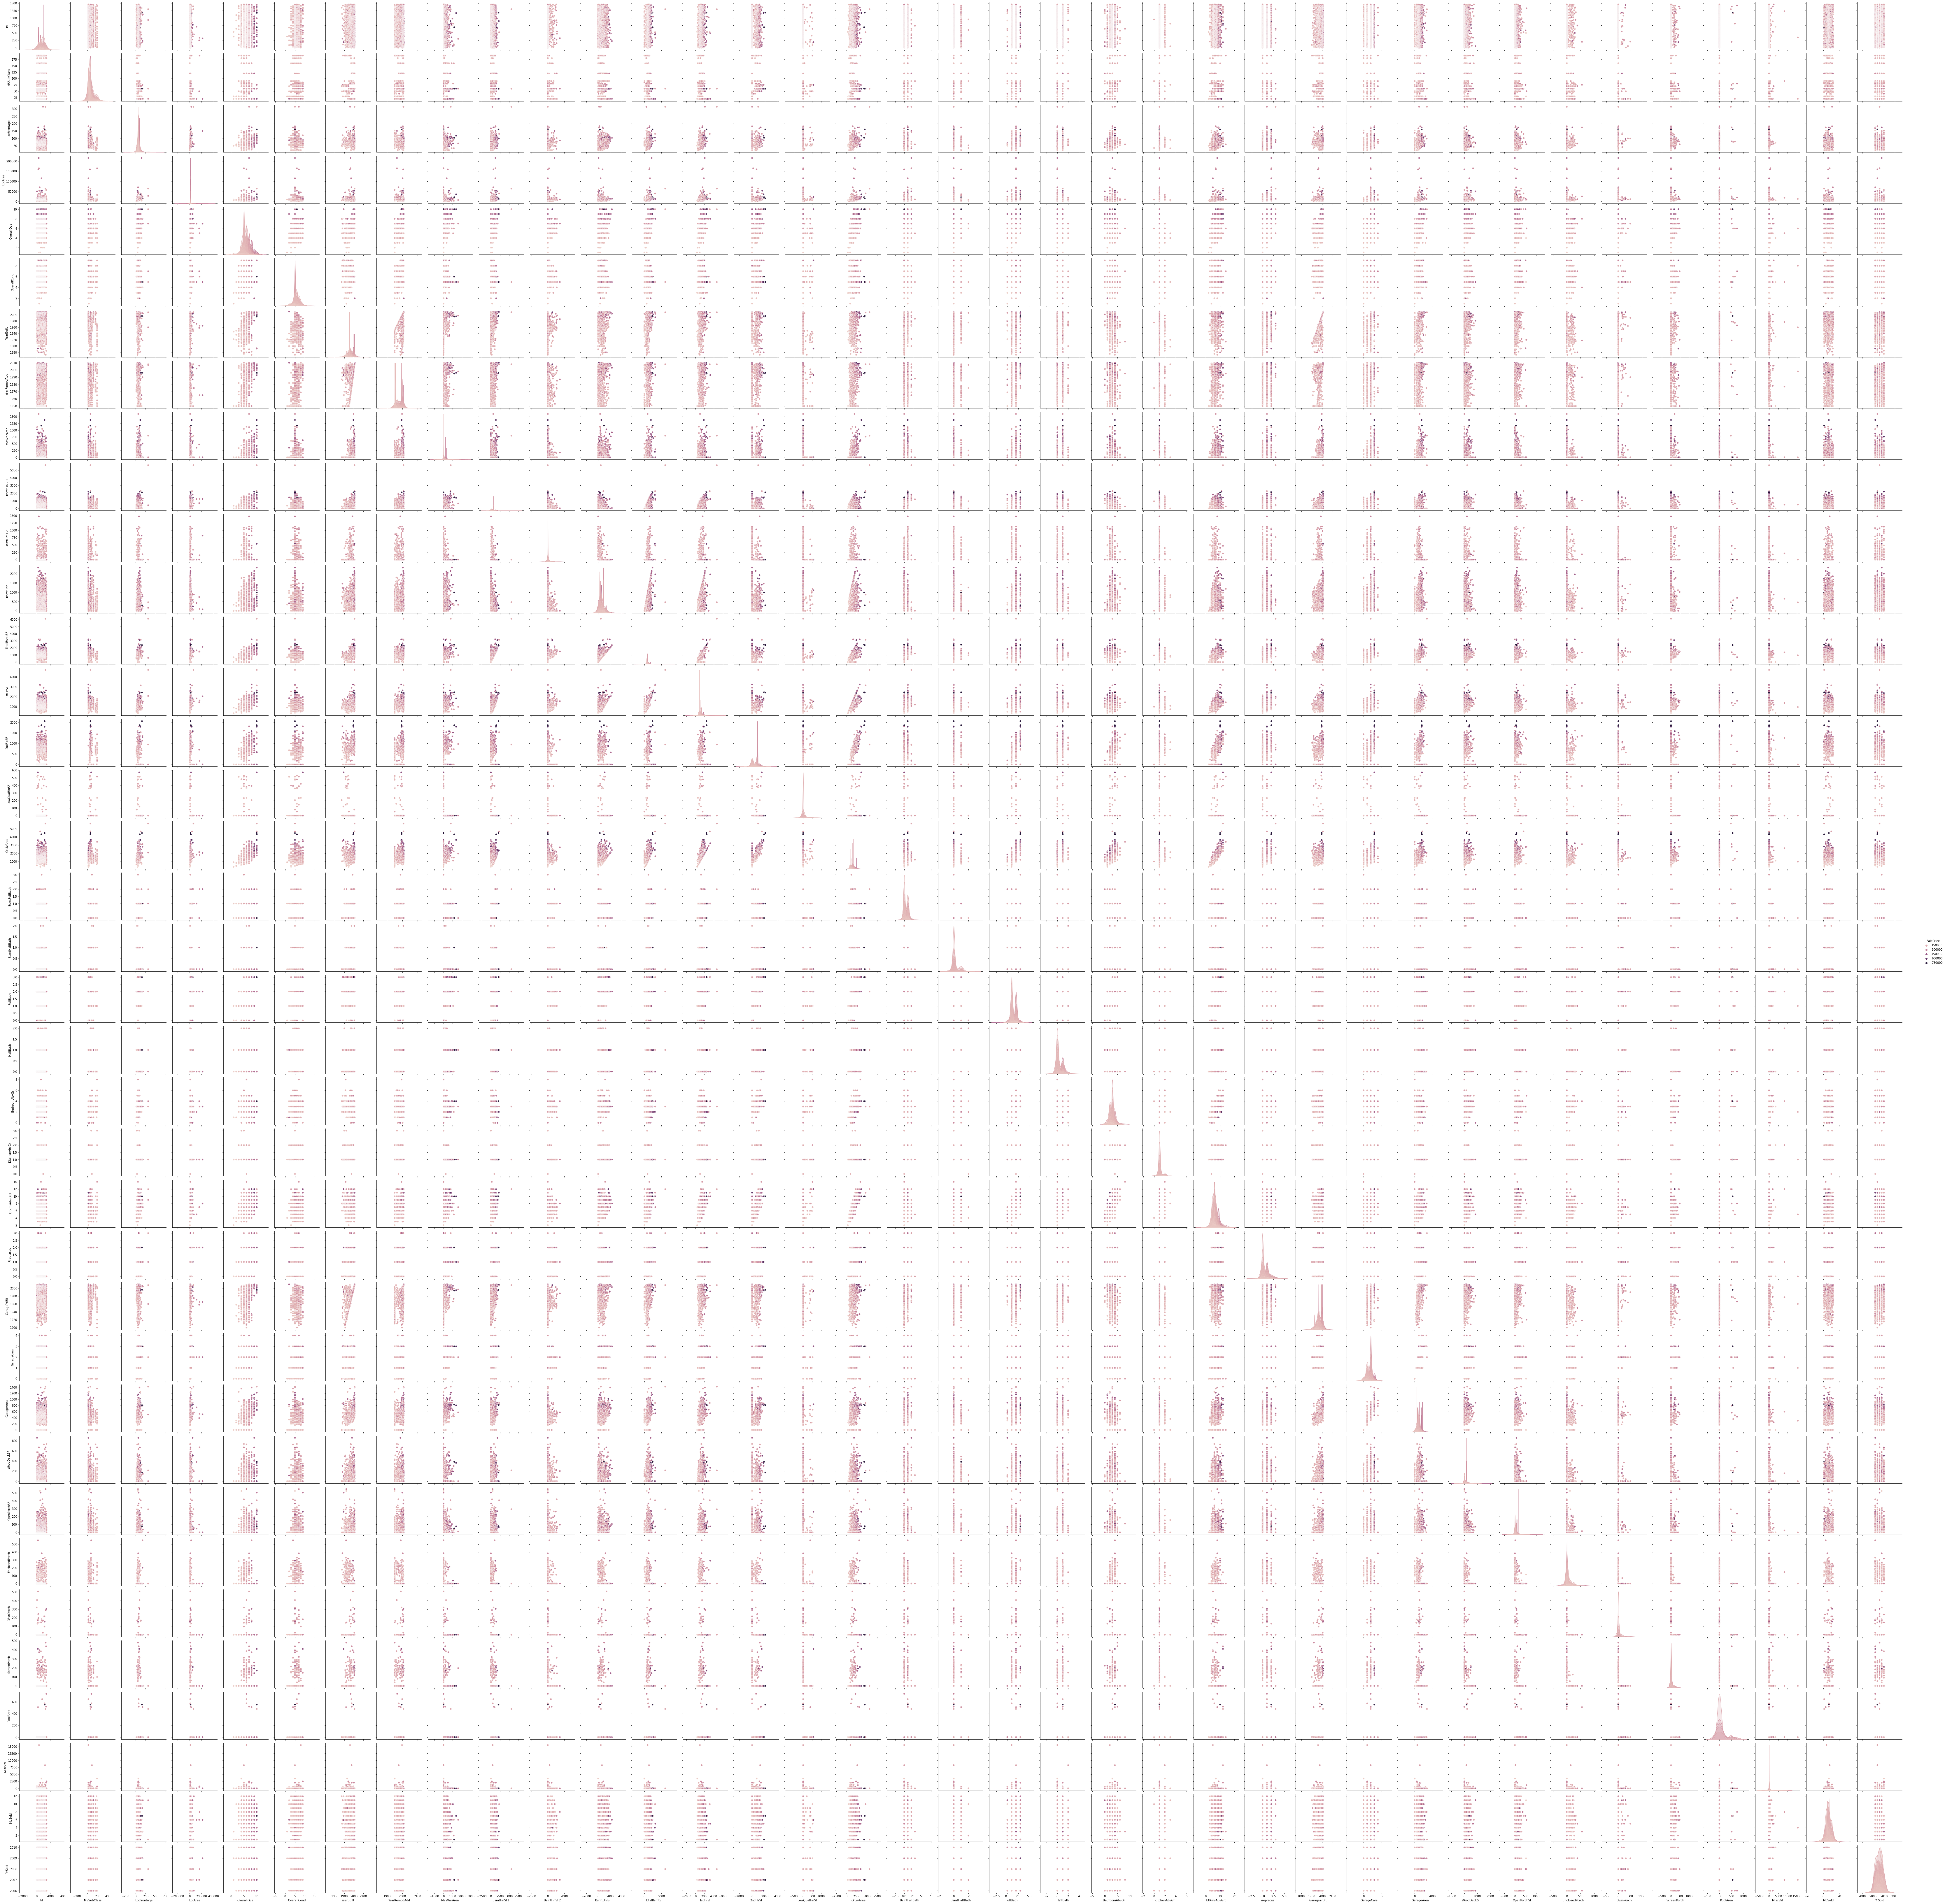

In [20]:
# sns.pairplot(train_df,hue="SalePrice")

In [319]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error 

In [168]:
X_train = data2[:1460]
X_test = data2[1460:]
train = data2[1460:]
y = pd.DataFrame(price)

In [291]:
# split data
x_train, x_test, y_train, y_test = train_test_split(X_train, y, test_size = 0.5, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape,

((730, 324), (730, 324), (730, 1), (730, 1))

In [315]:
# Linear regression 
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
yprediction_lr = linear.predict(x_test)
linear_score = linear.score(x_test, y_test)
print(f"Linear regression score is: {linear.score(x_test, y_test)}")

Linear regression score is: 0.7368596203154345


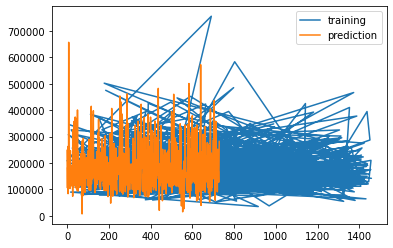

In [293]:
plt.plot(y_train, label='training')
plt.plot(y_pred, label='prediction')
plt.legend()
plt.show()

In [314]:
# Lasso method
lasso = linear_model.Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
lasso_coe = lasso.fit(x_train,y_train)
yprediton_la = lasso.predict(x_test)
lasso_score = lasso.score(x_test,y_test)
print(f"Lasso score is: {lasso.score(x_test,y_test)}")

/home/canyuhappy/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.881e+10, tolerance: 4.535e+08
  model = cd_fast.enet_coordinate_descent(


Lasso score is: 0.7419461306796353


/home/canyuhappy/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.881e+10, tolerance: 4.535e+08
  model = cd_fast.enet_coordinate_descent(


In [318]:
# Ridge regression 
ridge = linear_model.Ridge(alpha = 0.1)
ridge.fit(x_train, y_train)    
ypredition_ridge = ridge.predict(x_test)
ypredition_ridge1 = ridge.predict(x_train) 
ridge_score = ridge.score(x_test, y_test)
print(f"Ridge score is: {ridge.score(x_test, y_test)}")

Ridge score is: 0.7433409477945765


In [298]:
from IPython.display import HTML, display
import tabulate

In [365]:
# Evaluating RMSE
rmse_linear = mean_squared_error(y_test, y_pred, squared= False)
rmse_lasso = mean_squared_error(y_test, y_pred_ridge, squared = False)
rmse_ridge = mean_squared_error(y_test, y_pred_lss, squared = False)

In [366]:
rmse_linear, rmse_lasso, rmse_ridge

(28851.23429627093, 40532.44669385521, 40642.43453053721)

In [371]:
table = [['Linear_Regression', rmse_linear,linear_score],
        ['Lasso', rmse_lasso,lasso_score],
        ['Ridge', rmse_ridge,ridge_score]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=['RMSE','Scores'])))

In [325]:
y_predrict = linear.predict(X_test)
y_predrict.shape

(1459, 1)

In [326]:
prediction = pd.DataFrame(y_predrict)
prediction.columns = ['SalePrice']

In [327]:
id = pd.DataFrame(test_df["Id"])

In [328]:
submission  = pd.concat([id, prediction],axis = 1)
submission

Id      SalePrice
0     1461  119040.537780
1     1462  166406.159076
2     1463  176519.635826
3     1464  190604.098348
4     1465  195729.775911
...    ...            ...
1454  2915   90509.142888
1455  2916   78157.631517
1456  2917  165785.857512
1457  2918  107597.426696
1458  2919  219811.761097

[1459 rows x 2 columns]